<a href="https://colab.research.google.com/github/Dvados/NM/blob/main/%D0%9B%D1%805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №5 студента групи АнД-31 Тищенко Владислава

In [4]:
import zipfile
import pathlib
import numpy as np

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
all_class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
n = 10
my_class_names = [all_class_names[n-1], all_class_names[n+29], all_class_names[n+59]]
print(my_class_names)

--2022-05-29 16:32:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   249MB/s    in 6.3s    

2022-05-29 16:32:25 (247 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]

['breakfast_burrito', 'foie_gras', 'oysters']


In [5]:
from pathlib import Path
import shutil

for path in all_class_names:
  if path != my_class_names[0] and path != my_class_names[1] and path != my_class_names[2]:
    dirpath = Path('101_food_classes_10_percent/train') / path
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path('101_food_classes_10_percent/test') / path
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 3 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/breakfast_burrito'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/oysters'.
There are 3 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/foie_gras'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/breakfast_burrito'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/oysters'.
Image shape: (384, 512, 3)


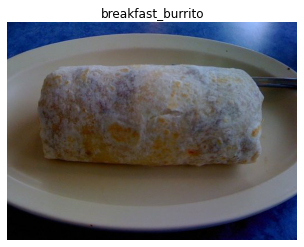

In [6]:
import os
for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Define training and test directory paths
train_dir = "101_food_classes_10_percent/test/"
test_dir = "101_food_classes_10_percent/train/"

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(my_class_names))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_data[1]

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data_augmented,
                          epochs=30,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/30
24/24 [==============================] - 48s 2s/step - loss: 1.2565 - accuracy: 0.3920 - val_loss: 1.0156 - val_accuracy: 0.5022
Epoch 2/30
24/24 [==============================] - 47s 2s/step - loss: 0.9865 - accuracy: 0.5013 - val_loss: 0.9500 - val_accuracy: 0.5289
Epoch 3/30
24/24 [==============================] - 46s 2s/step - loss: 0.9026 - accuracy: 0.5933 - val_loss: 0.9287 - val_accuracy: 0.5867
Epoch 4/30
24/24 [==============================] - 46s 2s/step - loss: 0.8660 - accuracy: 0.6173 - val_loss: 0.9095 - val_accuracy: 0.5911
Epoch 5/30
24/24 [==============================] - 46s 2s/step - loss: 0.8600 - accuracy: 0.6213 - val_loss: 0.8661 - val_accuracy: 0.6400
Epoch 6/30
24/24 [==============================] - 46s 2s/step - loss: 0.8488 - accuracy: 0.6013 - val_loss: 0.9344 - val_accuracy: 0.5644
Epoch 7/30
24/24 [==============================] - 46s 2s/step - loss: 0.8125 - accuracy: 0.6733 - val_loss: 0.8136 - val_accuracy: 0.6622
Epoch 8/30
24/24 [==

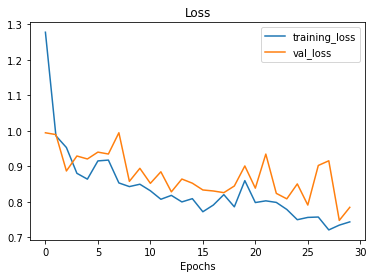

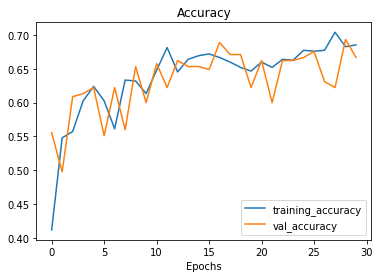

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [9]:
def load_and_prep_image(filename, img_shape=224):

  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);